## Modelling with Linear Regression 

Given n data points: $(x_i, y_i)$, need to fit a model: $y = \beta_0 + \beta_1 x + \epsilon_i$. The $\epsilon_i$
are the random error terms such that $\epsilon_i \sim N(0, \sigma^2)$ (*Normal with zero mean and standard deviation* 
$\sigma$). Each data point needs to fit the model (with differring $\epsilon_i$). Ignoring the error terms, this results in $n$ equations in 2 unknowns:

\begin{align*}
y_1 &= \beta_0 + \beta_1 x_1 + \epsilon_1\\
y_2 &= \beta_0 + \beta_1 x_2 + \epsilon_2\\
\ldots & \ldots  \\
y_n &= \beta_0 + \beta_1 x_n + \epsilon_n\\
\end{align*}

$\text{which we can express as a matrix equation:}$

$Y = X \mathbb{\beta} + \mathbb{\epsilon_i}$

$\text{Where}$


 $X = \begin{bmatrix}
         1 & x_1 \\
         1 & x_2 \\
         \ldots & \ldots \\
         1 & x_n \\
        \end{bmatrix} \ $  $Y = \begin{bmatrix} y_1 \\ y_2 \\ \ldots \\ y_n \end{bmatrix}\ $ 
$\beta = \begin{bmatrix} \beta_0\\ \beta_1\\ \end{bmatrix}$

$\text{To solve for } \mathbb{\beta}, \text{ multiply both sides by the transpose of} X$
$\text{(the transpose of a matrix is when the rows and columns are interchanged)}$

$X^T Y = X^T X \mathbb{\beta}$

$ \mathbb{\beta} = \left ( X^T X \right)^{-1} X^TY$



Problem 1. The data file {\tt IrisData_slr10.xls} contains data for *Iris Setosa* in 3 columns: Entry number, sepal width, sepal length, in an Excel file. Using matrix regression as shown above, fit a model $y = \beta_0 + \beta_1 x$,
 where $x$ is the sepal width and $y$ is the sepal length. Plot the data with the regression line superposed upon it.
 Comment on the fit of the model.
 
 To read an Excel file into Python, use the *Pandas* module. 
 * import pandas as pd
 * dataXY = pd.read_excel(excelFileName).
 * dataXY.head()                     # will display the first few lines of  * dataXY *. 
 * myDataArray = np.array(dataXY)   # will create a numpy array that you can use as before.
 
Plot the *residuals* $e = y - \hat{y}$ versus $y$. The plot of the residuals should not show any pattern.

*** No CODEPAGE record, no encoding_override: will use 'ascii'
HELLLLO
HELO


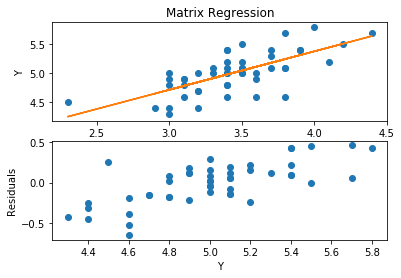

In [6]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Preparing data
dataXY = pd.read_excel('IrisData_slr10.xls')
X = np.array(dataXY['X']).reshape(48, 1)
ones = np.ones((48,1)) #Adding bias
Xones = np.hstack((ones, X))
Y = np.array(dataXY['Y']).reshape(48, 1)

#Calculations
#I assume you want this in without using numpy or scipys solver for regression - 
#to show we know what it means.
B = np.linalg.inv(Xones.T@Xones)@(Xones.T@Y)
Yhat = B[1]*Xones + B[0]
Yhat = np.hsplit(Yhat, 2)[1]
residuals = Y - Yhat

#Plotting regression line
plt.subplot(2, 1, 1)
plt.plot(X, Y, 'o')
plt.plot(X, X*B[1] + B[0], '-')
plt.title('Matrix Regression')
plt.ylabel('Y')

#Plotting residuals
plt.subplot(2, 1, 2)
plt.plot(Y, residuals, 'o')
plt.xlabel('Y')
plt.ylabel('Residuals')

The way the question was worded and that it was asked before calculating the errors makes me think I am supposed to comment on the fit of the model without looking at R^2, f-test, RMSE values, etc. so without that the fit looks pretty good I guess. It follows the overall trend of the data nicely.  
  
  

Problem 2. The data file *agentOrangeExposure.dat* contains the three columns: subject number, dioxin level in plasma, dioxin level in fat tissue. The first line contains the column headers. Researchers want the degree of linear association between the dioxin levels in blood plasma and fat tissue. 

Build a model to predict the dioxin levels in the blood plasma from the observed levels in the fatty tissue.
Next, build a model to predict the dioxin levels in the blood plasma from the observed levels in the fatty tissue.
Make residual plots in each case.

Use numpy to load the data this time:
* x, y = loadtxt('input.dat',unpack=True, usecols=[1,2]) *

Text(0, 0.5, 'Residuals')

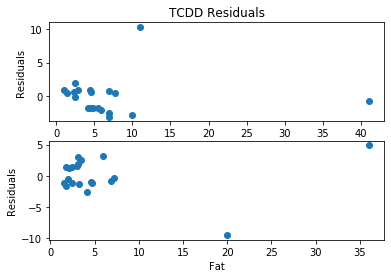

In [93]:
#Loading data
plasma, fat = np.loadtxt('agentOrangeExposure.dat.txt', unpack=True, usecols=[1, 2], skiprows=1)

#In this question I used numpys regression solver 'polyfit' as it's much cleaner
#Calculation
B2 = np.polyfit(fat, plasma, 1)
plasmaHat = B2[0]*fat + B2[1]
plasmaResid = plasma - plasmaHat

#plotting
plt.subplot(2, 1, 1)
plt.title('TCDD Residuals')
plt.plot(fat, plasmaResid, 'o')
plt.xlabel('Plasma')
plt.ylabel('Residuals')

#Same thing but switched variables
B1 = np.polyfit(plasma, fat, 1)
fatHat = B1[0]*plasma + B1[1]
fatResid = fat - fatHat

#plotting
plt.subplot(2, 1, 2)
plt.plot(plasma, fatResid, 'o')
plt.xlabel('Fat')
plt.ylabel('Residuals')